In [1]:
#Import the necessary libraries: pandas, matplotlib, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint as sp_randint

In [2]:
# Load CSV
df = pd.read_csv("Data.csv")

In [3]:
df.head()

,Familia,Tipo,Fecha,Año,Mes,Hora,Articulo,Cantidad,Precio,Importe,Festivo,Es_Festivo,Dia_semana,Temperatura,Humedad,Viento,Precipitación
0,BOLLERIA,VENTA,2017-01-01,2017,1,8,5820,3.0,4.091,12.273,Año Nuevo,Sí,Sunday,12.54,67.47,1.22,0.0
1,BOLLERIA,VENTA,2017-01-01,2017,1,9,3880,12.0,2.182,26.184,Año Nuevo,Sí,Sunday,12.54,67.47,1.22,0.0
2,BOLLERIA,VENTA,2017-01-01,2017,1,9,3894,6.0,3.000,18.000,Año Nuevo,Sí,Sunday,12.54,67.47,1.22,0.0
3,BOLLERIA,VENTA,2017-01-01,2017,1,9,3960,21.0,1.773,37.233,Año Nuevo,Sí,Sunday,12.54,67.47,1.22,0.0
4,BOLLERIA,VENTA,2017-01-01,2017,1,9,3974,15.0,3.273,49.095,Año Nuevo,Sí,Sunday,12.54,67.47,1.22,0.0


In [4]:
df.tail()

,Familia,Tipo,Fecha,Año,Mes,Hora,Articulo,Cantidad,Precio,Importe,Festivo,Es_Festivo,Dia_semana,Temperatura,Humedad,Viento,Precipitación
942458,PASTELERIA,VENTA,2023-05-18,2023,5,20,5619,6.00,4.364,26.1840,Día no festivo,No,Thursday,0.0,0.0,0.0,0.0
942459,PASTELERIA,VENTA,2023-05-18,2023,5,20,7689,6.00,4.909,29.4540,Día no festivo,No,Thursday,0.0,0.0,0.0,0.0
942460,PASTELERIA,VENTA,2023-05-18,2023,5,20,5730,3.00,4.364,13.0920,Día no festivo,No,Thursday,0.0,0.0,0.0,0.0
942461,PASTELERIA,VENTA,2023-05-18,2023,5,20,5936,0.57,65.318,37.2313,Día no festivo,No,Thursday,0.0,0.0,0.0,0.0
942462,PASTELERIA,MERMA,2023-05-18,2023,5,21,8877,6.00,8.727,52.3620,Día no festivo,No,Thursday,0.0,0.0,0.0,0.0


In [5]:
# Get unique values ​​from each family
unique_articles = df.groupby('Familia')['Articulo'].unique().reset_index()

# Print results
print(unique_articles)

      Familia                                           Articulo
0    BOLLERIA  [5820, 3880, 3894, 3960, 3974, 5803, 5804, 626...
1   PANADERIA  [968, 854, 900, 936, 940, 970, 1043, 1084, 109...
2  PASTELERIA  [5619, 5837, 6549, 5403, 5498, 5518, 5629, 553...


In [6]:
# Get unique values ​​from 'Holiday' column
unique_festivo = df['Festivo'].unique()

# Print results
print(unique_festivo)

['Año Nuevo' 'Día no festivo' 'Día de Reyes' 'Día de San Valentín'
 'Día del Padre' 'Domingo de Ramos' 'Lunes Santo' 'Martes Santo'
 'Miércoles Santo' 'Jueves Santo' 'Viernes Santo' 'Sábado Santo'
 'Domingo de Resurrección' 'Día de la Cruz' 'Día de la Madre'
 'Día de San Juan' 'Día de la Virgen del Carmen' 'Feria de Málaga'
 'Día de la Victoria' 'Fiesta de la Virgen de la Victoria'
 'Día de la Hispanidad (Fiesta Nacional de España)' 'Noche de Halloween'
 'Día de Todos los Santos' 'Día de la Constitución' 'Nochebuena' 'Navidad'
 'Nochevieja']


In [7]:
# Convert 'Date' column to datetime type
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Define the new holidays and their dates until 2023-05-18
new_holidays = {
    'Día del Trabajador': ['2021-05-01', '2022-05-01', '2023-05-01'],
    'Día de la Inmaculada': ['2021-12-08', '2022-12-08']
}

# Update the 'Holiday' and 'It_Holiday' columns on the corresponding dates
for holiday, dates in new_holidays.items():
    for date in dates:
        df.loc[df['Fecha'] == date, 'Festivo'] = holiday
        df.loc[df['Fecha'] == date, 'Es_Festivo'] = 'Sí'

# Filter and print the rows corresponding to the new holidays
filtered_df = df[df['Fecha'].isin([pd.to_datetime(date) for dates in new_holidays.values() for date in dates])]

In [8]:
# Define the date range
start_date = '2021-05-01'
end_date = '2023-05-18'

# Filter the DataFrame to get the desired date range
df_filtrado = df[(df['Fecha'] >= start_date) & (df['Fecha'] <= end_date)]

# Filter the DataFrame to get only the rows where 'Type' is 'SALE'
df_filtrado = df_filtrado[df_filtrado['Tipo'] == 'VENTA']

In [9]:
# Print the filtered DataFrame
df_filtrado.head()

,Familia,Tipo,Fecha,Año,Mes,Hora,Articulo,Cantidad,Precio,Importe,Festivo,Es_Festivo,Dia_semana,Temperatura,Humedad,Viento,Precipitación
253314,BOLLERIA,VENTA,2021-05-01,2021,5,7,3960,12.0,2.318,27.816,Día del Trabajador,Sí,Saturday,0.0,0.0,0.0,0.0
253315,BOLLERIA,VENTA,2021-05-01,2021,5,7,6626,3.0,2.727,8.181,Día del Trabajador,Sí,Saturday,0.0,0.0,0.0,0.0
253316,BOLLERIA,VENTA,2021-05-01,2021,5,8,3880,6.0,2.591,15.546,Día del Trabajador,Sí,Saturday,0.0,0.0,0.0,0.0
253317,BOLLERIA,VENTA,2021-05-01,2021,5,8,3960,9.0,2.318,20.862,Día del Trabajador,Sí,Saturday,0.0,0.0,0.0,0.0
253318,BOLLERIA,VENTA,2021-05-01,2021,5,9,3880,15.0,2.591,38.865,Día del Trabajador,Sí,Saturday,0.0,0.0,0.0,0.0


In [10]:
df_filtrado.tail()

,Familia,Tipo,Fecha,Año,Mes,Hora,Articulo,Cantidad,Precio,Importe,Festivo,Es_Festivo,Dia_semana,Temperatura,Humedad,Viento,Precipitación
942457,PASTELERIA,VENTA,2023-05-18,2023,5,20,5404,3.00,43.500,130.5000,Día no festivo,No,Thursday,0.0,0.0,0.0,0.0
942458,PASTELERIA,VENTA,2023-05-18,2023,5,20,5619,6.00,4.364,26.1840,Día no festivo,No,Thursday,0.0,0.0,0.0,0.0
942459,PASTELERIA,VENTA,2023-05-18,2023,5,20,7689,6.00,4.909,29.4540,Día no festivo,No,Thursday,0.0,0.0,0.0,0.0
942460,PASTELERIA,VENTA,2023-05-18,2023,5,20,5730,3.00,4.364,13.0920,Día no festivo,No,Thursday,0.0,0.0,0.0,0.0
942461,PASTELERIA,VENTA,2023-05-18,2023,5,20,5936,0.57,65.318,37.2313,Día no festivo,No,Thursday,0.0,0.0,0.0,0.0


In [11]:
# Add 'rain' column
df_filtrado['lluvia'] = df_filtrado['Precipitación'].apply(lambda x: 'Sí' if x > 0 else 'No')

In [12]:
df_filtrado.head()

,Familia,Tipo,Fecha,Año,Mes,Hora,Articulo,Cantidad,Precio,Importe,Festivo,Es_Festivo,Dia_semana,Temperatura,Humedad,Viento,Precipitación,lluvia
253314,BOLLERIA,VENTA,2021-05-01,2021,5,7,3960,12.0,2.318,27.816,Día del Trabajador,Sí,Saturday,0.0,0.0,0.0,0.0,No
253315,BOLLERIA,VENTA,2021-05-01,2021,5,7,6626,3.0,2.727,8.181,Día del Trabajador,Sí,Saturday,0.0,0.0,0.0,0.0,No
253316,BOLLERIA,VENTA,2021-05-01,2021,5,8,3880,6.0,2.591,15.546,Día del Trabajador,Sí,Saturday,0.0,0.0,0.0,0.0,No
253317,BOLLERIA,VENTA,2021-05-01,2021,5,8,3960,9.0,2.318,20.862,Día del Trabajador,Sí,Saturday,0.0,0.0,0.0,0.0,No
253318,BOLLERIA,VENTA,2021-05-01,2021,5,9,3880,15.0,2.591,38.865,Día del Trabajador,Sí,Saturday,0.0,0.0,0.0,0.0,No


In [13]:
df_filtrado.tail()

,Familia,Tipo,Fecha,Año,Mes,Hora,Articulo,Cantidad,Precio,Importe,Festivo,Es_Festivo,Dia_semana,Temperatura,Humedad,Viento,Precipitación,lluvia
942457,PASTELERIA,VENTA,2023-05-18,2023,5,20,5404,3.00,43.500,130.5000,Día no festivo,No,Thursday,0.0,0.0,0.0,0.0,No
942458,PASTELERIA,VENTA,2023-05-18,2023,5,20,5619,6.00,4.364,26.1840,Día no festivo,No,Thursday,0.0,0.0,0.0,0.0,No
942459,PASTELERIA,VENTA,2023-05-18,2023,5,20,7689,6.00,4.909,29.4540,Día no festivo,No,Thursday,0.0,0.0,0.0,0.0,No
942460,PASTELERIA,VENTA,2023-05-18,2023,5,20,5730,3.00,4.364,13.0920,Día no festivo,No,Thursday,0.0,0.0,0.0,0.0,No
942461,PASTELERIA,VENTA,2023-05-18,2023,5,20,5936,0.57,65.318,37.2313,Día no festivo,No,Thursday,0.0,0.0,0.0,0.0,No


In [14]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335699 entries, 253314 to 942461
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Familia        335699 non-null  object        
 1   Tipo           335699 non-null  object        
 2   Fecha          335699 non-null  datetime64[ns]
 3   Año            335699 non-null  int64         
 4   Mes            335699 non-null  int64         
 5   Hora           335699 non-null  int64         
 6   Articulo       335699 non-null  int64         
 7   Cantidad       335699 non-null  float64       
 8   Precio         335699 non-null  float64       
 9   Importe        335699 non-null  float64       
 10  Festivo        335699 non-null  object        
 11  Es_Festivo     335699 non-null  object        
 12  Dia_semana     335699 non-null  object        
 13  Temperatura    335699 non-null  float64       
 14  Humedad        335699 non-null  float64       
 15  

In [15]:
#Convert Date column to datetime
df_filtrado["Fecha"] = pd.to_datetime(df_filtrado["Fecha"])

In [16]:
# Assign 'Date' as index of the DataFrame
df_filtrado.set_index('Fecha', inplace=True)

In [17]:
# Convert categorical columns to dummy variables without removing the first category
df_filtrado = pd.get_dummies(df_filtrado, columns=['Familia', 'Tipo', 'Dia_semana', 'Es_Festivo', 'lluvia', 'Festivo'], drop_first=False)

In [18]:
# Check the names of the generated columns
print(df_filtrado.columns)

Index(['Año', 'Mes', 'Hora', 'Articulo', 'Cantidad', 'Precio', 'Importe',
       'Temperatura', 'Humedad', 'Viento', 'Precipitación', 'Familia_BOLLERIA',
       'Familia_PANADERIA', 'Familia_PASTELERIA', 'Tipo_VENTA',
       'Dia_semana_Friday', 'Dia_semana_Monday', 'Dia_semana_Saturday',
       'Dia_semana_Sunday', 'Dia_semana_Thursday', 'Dia_semana_Tuesday',
       'Dia_semana_Wednesday', 'Es_Festivo_No', 'Es_Festivo_Sí', 'lluvia_No',
       'lluvia_Sí', 'Festivo_Año Nuevo', 'Festivo_Domingo de Ramos',
       'Festivo_Domingo de Resurrección', 'Festivo_Día de Reyes',
       'Festivo_Día de San Juan', 'Festivo_Día de San Valentín',
       'Festivo_Día de Todos los Santos', 'Festivo_Día de la Constitución',
       'Festivo_Día de la Cruz',
       'Festivo_Día de la Hispanidad (Fiesta Nacional de España)',
       'Festivo_Día de la Inmaculada', 'Festivo_Día de la Madre',
       'Festivo_Día de la Victoria', 'Festivo_Día de la Virgen del Carmen',
       'Festivo_Día del Padre', 'Festivo_

In [19]:
# Separate data by product family
familias = ['Familia_BOLLERIA', 'Familia_PANADERIA', 'Familia_PASTELERIA']

In [20]:
for familia in familias:
    data_familia = df_filtrado[df_filtrado[familia] == 1]
    
    # Check the amount of data available for each family
    print(f"Datos disponibles para {familia}: {len(data_familia)} registros")
    
    if len(data_familia) > 0:
        # Create correlation matrix
        correlacion = data_familia.corr()
        
        # Select features based on correlation matrix
        print(f"Correlaciones para {familia}:")
        print(correlacion['Cantidad'].sort_values(ascending=False))
        print("\n")

Datos disponibles para Familia_BOLLERIA: 152676 registros
Correlaciones para Familia_BOLLERIA:
Cantidad                                                    1.000000
Importe                                                     0.741401
Dia_semana_Sunday                                           0.085260
Festivo_Año Nuevo                                           0.025913
Festivo_Día del Padre                                       0.025286
Dia_semana_Saturday                                         0.024616
Festivo_Día de la Hispanidad (Fiesta Nacional de España)    0.023378
Año                                                         0.022152
Humedad                                                     0.021445
Es_Festivo_Sí                                               0.020990
Viento                                                      0.018227
Festivo_Día de la Constitución                              0.017629
Festivo_Día de Todos los Santos                             0.017118
Festivo_

In [22]:
# Filter the desired dates for prediction using the index
fechas_prediccion = pd.date_range(start='2023-05-11', end='2023-05-18')
data_prediccion = df_filtrado[df_filtrado.index.isin(fechas_prediccion)]

In [23]:
# Modeled by Product Family
resultados = {}
predicciones = {}
valores_reales = {}

for familia in familias:
    data_familia = df_filtrado[df_filtrado[familia] == 1]
    
    if len(data_familia) > 0:
        # Select the characteristics and the target variable
        X = data_familia.drop(columns=['Cantidad'])
        y = data_familia['Cantidad']
        
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Apply Min-Max Scaling after splitting the data
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()
        
        X_train_scaled = scaler_X.fit_transform(X_train)
        X_test_scaled = scaler_X.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
        
        # Define the models and their hyperparameters for Random Search
        modelos = {
            'LinearRegression': (LinearRegression(), {}),
            'DecisionTree': (DecisionTreeRegressor(), {'max_depth': sp_randint(1, 20), 'min_samples_split': sp_randint(2, 20)}),
            'RandomForest': (RandomForestRegressor(), {'n_estimators': sp_randint(10, 100), 'max_depth': sp_randint(1, 10), 'min_samples_split': sp_randint(2, 10)}),
            'GradientBoosting': (GradientBoostingRegressor(), {'n_estimators': sp_randint(10, 100), 'learning_rate': [0.01, 0.1], 'max_depth': sp_randint(1, 10), 'min_samples_split': sp_randint(2, 10)})
        }
        
        resultados[familia] = {}
        predicciones[familia] = {}
        valores_reales[familia] = y_test
        
        for nombre_modelo, (modelo, param_distrib) in modelos.items():
            if param_distrib:
                random_search = RandomizedSearchCV(modelo, param_distrib, n_iter=10, scoring='neg_mean_squared_error', cv=3, random_state=42)
                random_search.fit(X_train_scaled, y_train_scaled)
                best_model = random_search.best_estimator_
            else:
                best_model = modelo
                best_model.fit(X_train_scaled, y_train_scaled)
            
            # Prediction for the test set
            y_pred_scaled = best_model.predict(X_test_scaled)
            y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
            
            predicciones[familia][nombre_modelo] = y_pred
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            r2 = r2_score(y_test, y_pred)
            resultados[familia][nombre_modelo] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2': r2}
            
            # Prediction for desired dates
            X_pred_scaled = scaler_X.transform(data_prediccion.drop(columns=['Cantidad']))
            y_pred_fechas_scaled = best_model.predict(X_pred_scaled)
            y_pred_fechas = scaler_y.inverse_transform(y_pred_fechas_scaled.reshape(-1, 1)).flatten()
            
            predicciones[familia][f'{nombre_modelo}_fechas'] = y_pred_fechas

In [24]:
# Save downscaled predictions to a CSV file
predicciones_list = []
for familia, modelos in predicciones.items():
    for modelo, y_pred in modelos.items():
        for fecha, pred in zip(fechas_prediccion, y_pred):
            predicciones_list.append({'Fecha': fecha, 'Familia': familia, 'Modelo': modelo, 'Prediccion': pred})

predicciones_df = pd.DataFrame(predicciones_list)
predicciones_df.to_csv('predicciones_desescaladas.csv', index=False)

print("Proceso completado.")

Proceso completado.


In [25]:
# Show performance metrics
for familia, modelos in resultados.items():
    print(f"Familia: {familia}")
    for modelo, metricas in modelos.items():
        print(f"  Modelo: {modelo}")
        for metrica, valor in metricas.items():
            print(f"    {metrica}: {valor:.4f}")

Familia: Familia_BOLLERIA
  Modelo: LinearRegression
    MSE: 15.3539
    MAE: 1.8588
    RMSE: 3.9184
    R2: 0.7582
  Modelo: DecisionTree
    MSE: 0.5270
    MAE: 0.0135
    RMSE: 0.7260
    R2: 0.9917
  Modelo: RandomForest
    MSE: 0.5067
    MAE: 0.0556
    RMSE: 0.7118
    R2: 0.9920
  Modelo: GradientBoosting
    MSE: 0.3098
    MAE: 0.0223
    RMSE: 0.5566
    R2: 0.9951
Familia: Familia_PANADERIA
  Modelo: LinearRegression
    MSE: 137.3497
    MAE: 6.0787
    RMSE: 11.7196
    R2: 0.7591
  Modelo: DecisionTree
    MSE: 3.6278
    MAE: 0.1364
    RMSE: 1.9047
    R2: 0.9936
  Modelo: RandomForest
    MSE: 3.8646
    MAE: 0.5519
    RMSE: 1.9659
    R2: 0.9932
  Modelo: GradientBoosting
    MSE: 1.5690
    MAE: 0.2887
    RMSE: 1.2526
    R2: 0.9972
Familia: Familia_PASTELERIA
  Modelo: LinearRegression
    MSE: 15.2442
    MAE: 2.5806
    RMSE: 3.9044
    R2: 0.3562
  Modelo: DecisionTree
    MSE: 0.0368
    MAE: 0.0171
    RMSE: 0.1918
    R2: 0.9984
  Modelo: RandomForest
 

In [26]:
# Create a DataFrame for the metrics
metricas_df = []
for familia, modelos in resultados.items():
    for modelo, metricas in modelos.items():
        for metrica, valor in metricas.items():
            metricas_df.append({'Familia': familia, 'Modelo': modelo, 'Métrica': metrica, 'Valor': valor})

metricas_df = pd.DataFrame(metricas_df)

In [29]:
# List of metrics to graph
metricas = metricas_df['Métrica'].unique()

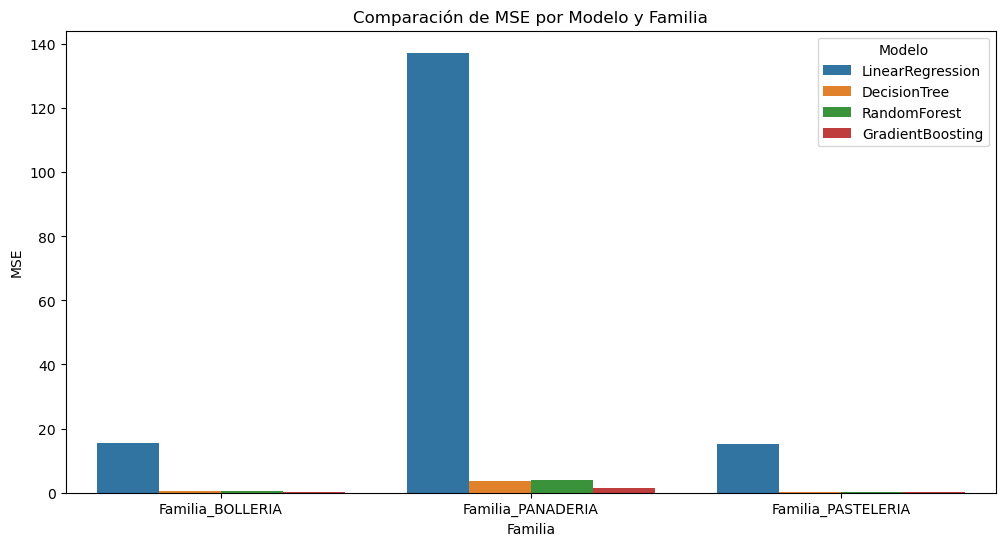

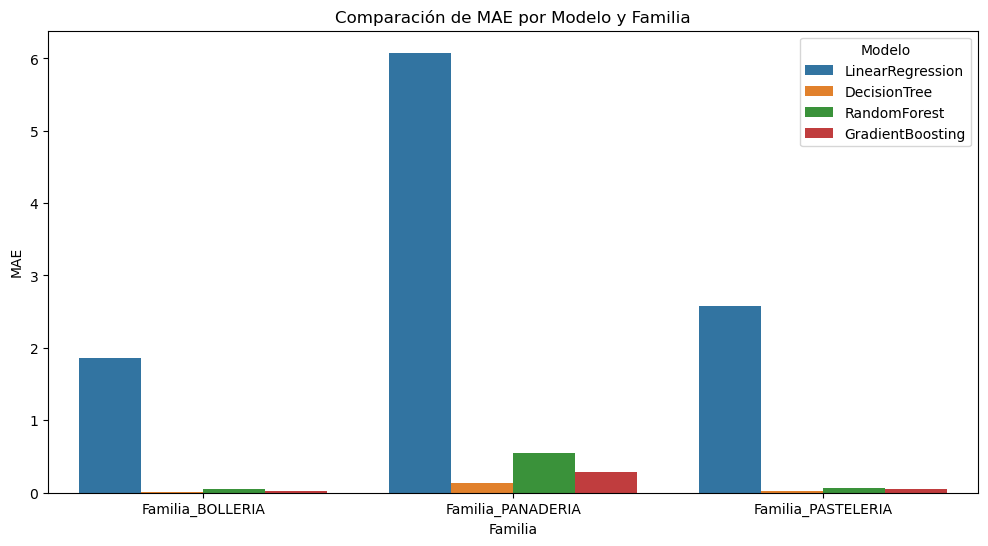

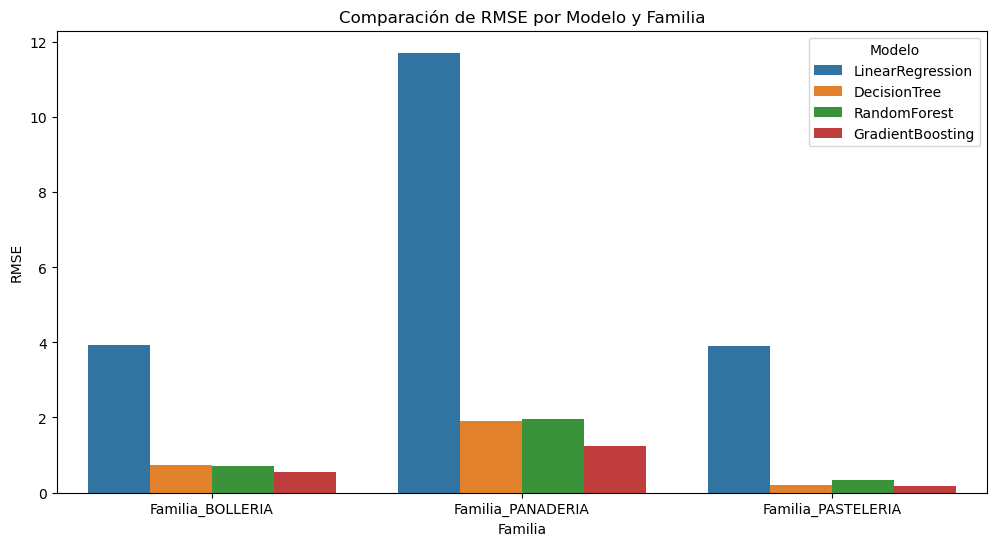

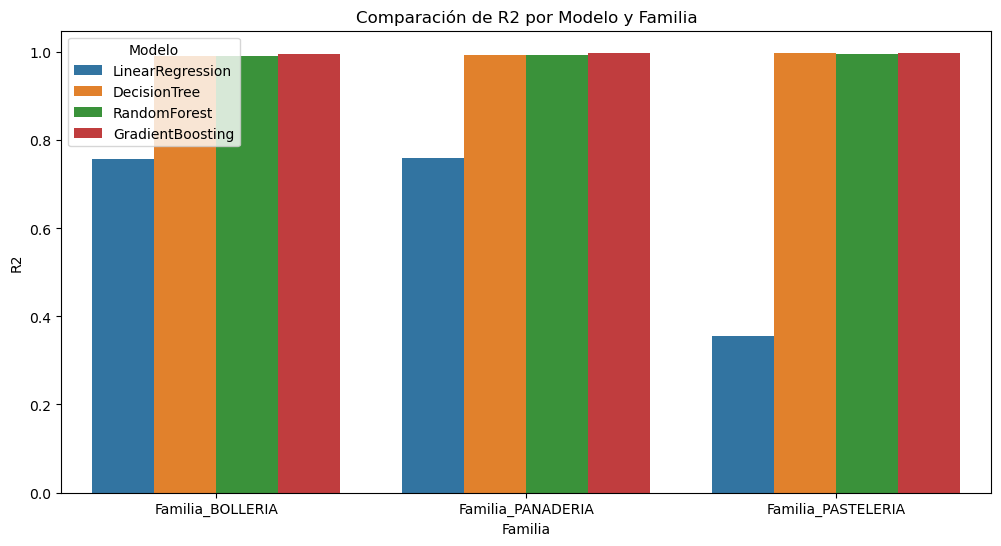

In [30]:
# Create bar charts for each metric
for metrica in metricas:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=metricas_df[metricas_df['Métrica'] == metrica], x='Familia', y='Valor', hue='Modelo')
    plt.title(f'Comparación de {metrica} por Modelo y Familia')
    plt.ylabel(metrica)
    plt.xlabel('Familia')
    plt.legend(title='Modelo')
    plt.show()